### Download source code and run on Jupyter Notebook then execute to see the result one by one

#### What we will do:
- Read data file by pandas to dataframe
- Set column names to dataframe
- Investigate data
- Filter data in columns
- Visualization missing values by histogram
- Drop null data
- Save file to CSV without adding row index

**Dataset** <br>
[Adult dataset from UCI](https://archive.ics.uci.edu/ml/datasets/Adult "dataset")


In [1]:
import pandas as pd

# Set ipython's max row display
pd.set_option('display.max_row', 1000)
# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

# Read data file
# delimiter=', '           set separator 
# names = ['', '', ..],    set column names
df = pd.read_csv("adult.data", header=None, delimiter=', ', 
                 names = ['age', 'workclass', 'fnlwgt', 
                  'education', 'education-num', 'marital-status',
                  'occupation', 'relationship', 'race', 'sex', 
                  'capital-gain', 'capital-loss','hours-per-week','nativecountry', 'income'])

# Another way to add column
# df.columns = ['age', 'workclass', 'fnlwgt', 
#               'education', 'education-num', 'marital-status',
#               'occupation', 'relationship', 'race', 'sex', 
#               'capital-gain', 'capital-loss','hours-per-week','nativecountry', 'income']

# Display the first 5 rows and confirm is the column names and their values are correct.
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
#Show number of rows and columns in format of (row, column)
df.shape

(32561, 15)

In [3]:
#Show column information 
# e.g. column name, number of rows data, null or non-null, data type (object means string)
# At this step we should confirm the data type and missing value.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
nativecountry     32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [23]:
# Another way to get number of columns that contain null.
print("Number of columns contain null: ", df.isnull().any().sum())


Number of columns contain null:  0


In [24]:
# statistical check for numerical data
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**Note: We can't see missing value here but the data has really been processed and ready for next step?**

Let's check values in each column

In [25]:
# Loop to print unique value and its amount for each column where the data type is 'object'.
def print_unique_vals(df):
    for d in df.columns:
        if df[d].dtypes == object:
            print()
            print("Column name:", d)
            print(df[d].value_counts())
        
print_unique_vals(df)      


Column name: workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Column name: education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

Column name: marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

Column name: occupation



**Alert!**

columns 'workclass', 'occupation' and 'nativecountry' contain '?'; we need to pre-process this dataset

In [26]:
# Check number of row data that contain "?" from 'workclass', 'occupation' and 'nativecountry'
df_temp = df.loc[(df['workclass'] == '?') | (df['occupation'] == '?') | (df['nativecountry'] == '?')]
print("Number of rows contain '?': ", df_temp.shape[0])
df_temp.head()

Number of rows contain '?':  2399


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,nativecountry,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K


**Let's investigate samples with missing values**

In [33]:
print_unique_vals(df_temp[['workclass', 'occupation', 'nativecountry']])


Column name: workclass
?                   1836
Private              410
Self-emp-not-inc      42
Self-emp-inc          42
Local-gov             26
State-gov             19
Federal-gov           17
Never-worked           7
Name: workclass, dtype: int64

Column name: occupation
?                    1843
Prof-specialty        102
Other-service          83
Exec-managerial        74
Craft-repair           69
Sales                  66
Adm-clerical           49
Machine-op-inspct      36
Transport-moving       25
Handlers-cleaners      20
Tech-support           16
Priv-house-serv         6
Protective-serv         5
Farming-fishing         5
Name: occupation, dtype: int64

Column name: nativecountry
United-States         1666
?                      583
Mexico                  33
Canada                  14
Philippines             10
Taiwan                   9
Germany                  9
South                    9
China                    7
El-Salvador              6
Italy                    5
P

**Visualize it by histogram**

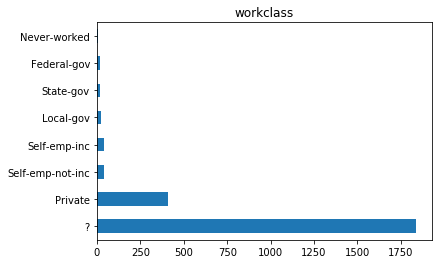

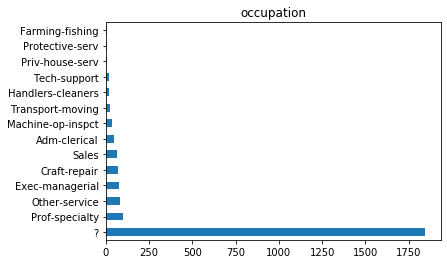

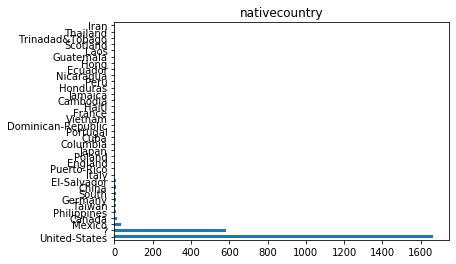

In [35]:

import matplotlib.pyplot as plt

df_missing = df_temp[['workclass', 'occupation', 'nativecountry']]
# Loop to show histogram in missing value samples
for d in df_missing.columns:
    if df_missing[d].dtypes == object:
        fig, ax = plt.subplots()
        df_missing[d].value_counts().plot(kind='barh', title=d)


**Let's try dropping missing value rows**

In [37]:
# drop all rows contain '?'
import numpy as np

print("Row numbers is reduced from ", df.shape[0], "to ", df.shape[0] - df_temp.shape[0])

# Way 1: Filter data 
df_filtered = df.loc[(df['workclass'] != '?') & (df['occupation'] != '?') & (df['nativecountry'] != '?') ]
print(df_filtered.shape)

# Way 2: Replace with NaN then dropna()
# # replace '?' by NaN
df_replaced = df.replace('?', np.nan)
# drop NaN
df_replaced.dropna(inplace=True)
print(df3.shape)

Row numbers is reduced from  32561 to  30162
(30162, 15)
(30162, 15)


**Save CSV file for further using without adding row indexes to the first column**

In [39]:
# Save file
df_replaced.to_csv("adult_drop_missing.csv", index=False)

**Read the file**

In [40]:
df_new = pd.read_csv("adult_drop_missing.csv")
df_new.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,nativecountry,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
